<a href="https://colab.research.google.com/github/Ferdianap/python_for_datascience/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

**Link Dataset :**
https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset

In [ ]:
# Install library tambahan jika diperlukan
!pip install imbalanced-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek

In [ ]:
# Load Dataset
file_path = "/content/shopping_trends.csv"
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
data.shape

(3900, 19)

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Distribusi category
data['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


# EDA

In [ ]:
#Missing Value Checking
print(data.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


<ipython-input-9-5cbe71c015e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Category'], palette="viridis")


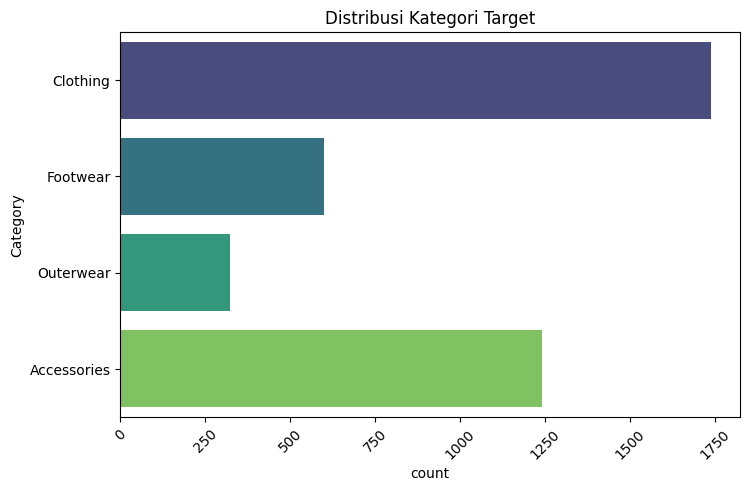

In [ ]:
# Visualisasi distribusi kategori target
plt.figure(figsize=(8, 5))
sns.countplot(data['Category'], palette="viridis")
plt.title("Distribusi Kategori Target")
plt.xticks(rotation=45)
plt.show()

# persiapan data

In [ ]:
# Variabel X (fitur) dan y (target)
X = data.drop(columns=['Category'])  # Drop kolom category
y = data['Category']

In [ ]:
# Mapping kategori menjadi angka sesuai dengan deskripsi
category_map = {
    'Clothing': 0,
    'Footwear': 1,
    'Outerwear': 2,
    'Accessories': 3
}

# Menerapkan mapping ke kolom Category
data['Category'] = data['Category'].map(category_map)

# Cek hasil perubahan
print(data['Category'].value_counts())

Category
0    1737
3    1240
1     599
2     324
Name: count, dtype: int64


keterangan Clothing: 0, Footwear: 1, Outerwear: 2 Accessories : 3

In [ ]:
# Encoding untuk variabel kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

In [ ]:
# Encode target y
y = encoder.fit_transform(y)

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imbalanced

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling menggunakan RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
# Distribusi kategori setelah oversampling
pd.Series(y_resampled).value_counts()

,count
1,1737
2,1737
3,1737
0,1737


# Modeling Logistic Regression

In [ ]:
# Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
# Use the resampled data for training:
model.fit(X_resampled, y_resampled)  # Changed from X_train_balanced, y_train_balanced to X_resampled, y_resampled

# Prediksi
y_pred = model.predict(X_test)

#Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix dan Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 49  54  28 118]
 [ 36 171  71  68]
 [  3  54  32  33]
 [ 22   0   2  39]]


In [ ]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.20      0.27       249
           1       0.61      0.49      0.55       346
           2       0.24      0.26      0.25       122
           3       0.15      0.62      0.24        63

    accuracy                           0.37       780
   macro avg       0.36      0.39      0.33       780
weighted avg       0.46      0.37      0.39       780



Akurasi (37%): Model hanya benar memprediksi 37% dari total data. Ini menunjukkan performa model belum memadai secara keseluruhan.

- Macro Avg:
1. Precision (35%): Rata-rata kemampuan model dalam memberikan prediksi benar untuk semua kelas.
2. Recall (37%): Kemampuan rata-rata model dalam menangkap data sebenarnya dari setiap kelas.
3. F1-Score (32%): Menunjukkan model sangat tidak seimbang dalam menangani kelas yang berbeda.
- Weighted Avg:
1. Precision (46%): Menghitung precision dengan mempertimbangkan proporsi jumlah data pada setiap kelas.
2. Recall (37%): Sama seperti akurasi karena mempertimbangkan semua kelas.
3. F1-Score (38%): Hasil ini lebih mendekati performa kelas mayoritas karena kelas minoritas tidak cukup terwakili.

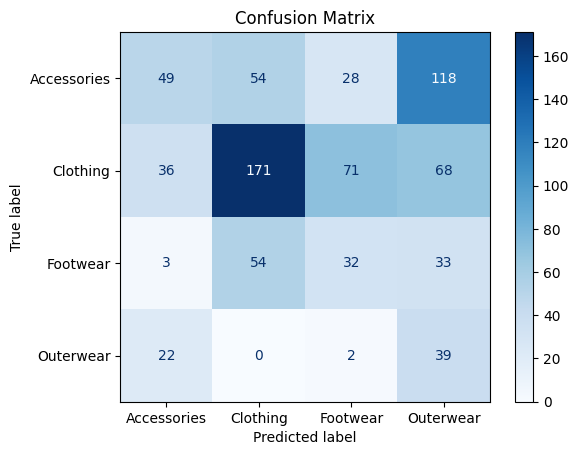

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature Engineering

In [ ]:
# Feature Extraction: Membuat fitur baru, disini 'Age' menjadi 'Age Group' untuk pengelompokkan
# Membagi umur menjadi kategori 'Young', 'Middle-Aged', dan 'Senior'
bins = [0, 25, 45, 100]
labels = ['Young', 'Middle-Aged', 'Senior']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

<ipython-input-23-bf6f1c486217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Age Group'], palette="viridis")


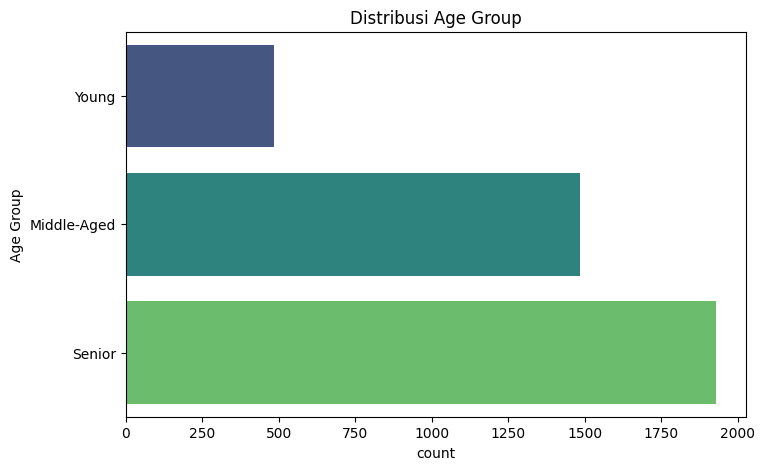

In [ ]:
# Visualisasi distribusi 'Age Group'
plt.figure(figsize=(8, 5))
sns.countplot(data['Age Group'], palette="viridis")
plt.title("Distribusi Age Group")
plt.show()

In [ ]:
# Mengubah kolom 'Discount Applied' ke numeric sebelum menerapkan fungsi lambda
data['Discount Applied'] = pd.to_numeric(data['Discount Applied'], errors='coerce')
data['Discount Applied'] = data['Discount Applied'].apply(lambda x: 1 if x > 0 else 0)

<ipython-input-25-ffe0fb80b037>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Discount Applied'], palette="viridis")


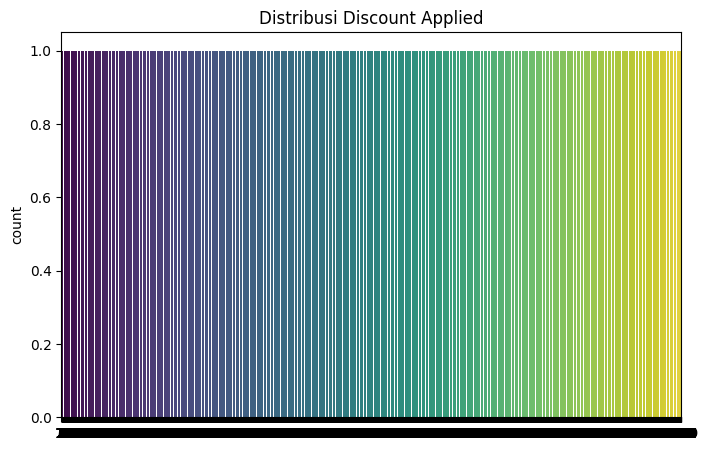

In [ ]:
# Visualisasi distribusi 'Discount Applied'
plt.figure(figsize=(8, 5))
sns.countplot(data['Discount Applied'], palette="viridis")
plt.title("Distribusi Discount Applied")
plt.show()